# Seyed Ali Mirferdos
# 99201465

# 1. Importing required modules

In [23]:
import numpy as np
from sklearn import svm
from sklearn.metrics import hinge_loss
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Creating the data

In [2]:
data = np.array([[-1, -1],
                [-6, -3],
                [ 2,  2],
                [ 2,  4],
                [ 2, -3],
                [ 4, -5],
                [-4,  5],
                [-6,  3]])

In [3]:
labels = [-1, -1, -1, -1, 1, 1, 1, 1]

# Part A: Creating a SVM Classifier with hinge loss

## Creating the classifier

In [66]:
clf = svm.LinearSVC(C=10, max_iter=7000)
clf.fit(data, labels)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=7000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Getting the prediction results

In [67]:
print(classification_report(labels, clf.predict(data)))

              precision    recall  f1-score   support

          -1       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



In [68]:
confusion_matrix(labels, clf.predict(data))

array([[2, 2],
       [1, 3]])

In [69]:
w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print('w =', w, 'b =', b)

w = [-0.01625258 -0.02571332] b = [-0.00775647]


## Getting the loss value

In [70]:
hinge_loss(labels, clf.predict(data))

0.75

## Plot and Compute Margin

In [71]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print(margin)

32.87409148806593


The following code is taken from [here](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html)

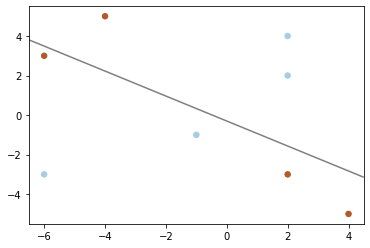

In [28]:
plt.scatter(data[:, 0], data[:, 1], 
            c=labels, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.show()

# Part B: Defining a seperable kernel

## Defining the kernel

In [52]:
def kernel(X):
  mul = X[:, 0] * X[:, 1]
  return np.array(mul / abs(mul)).reshape(-1, 1)

In [53]:
X_prime = kernel(data)
X_prime

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.]])

## Creating the classifier

In [72]:
clf = svm.LinearSVC(C=10, max_iter=7000)
clf.fit(X_prime, labels)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=7000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Getting the prediction results

In [73]:
print(classification_report(labels, clf.predict(X_prime)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [74]:
confusion_matrix(labels, clf.predict(X_prime))

array([[4, 0],
       [0, 4]])

In [75]:
w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print('w =', w, 'b =', b)

w = [-0.99375376] b = [-6.1730944e-07]


## Getting the loss value

In [76]:
hinge_loss(labels, clf.predict(X_prime))

0.0

## Plot and Compute Margin

In [77]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print(margin)

1.0062855057499045


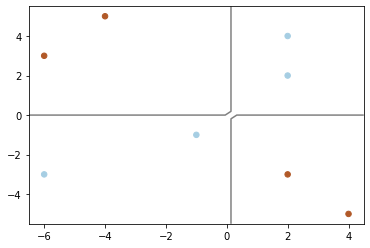

In [81]:
plt.scatter(data[:, 0], data[:, 1], 
            c=labels, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(kernel(xy)).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.show()

# Part C: Neural Network

In [83]:
clf = MLPClassifier(hidden_layer_sizes=4, solver='lbfgs', alpha=0.01)
clf.fit(data, labels)
clf.predict(data)

array([-1, -1, -1, -1,  1,  1,  1,  1])

In [84]:
print(classification_report(labels, clf.predict(data)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [85]:
confusion_matrix(labels, clf.predict(data))

array([[4, 0],
       [0, 4]])